<a href="https://colab.research.google.com/github/Zantorym/Aidi-capstone-I/blob/main/Module_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.32 ms (started: 2021-11-06 19:21:08 +00:00)


In [ ]:
import pickle
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.util import ngrams
import pandas as pd

time: 1.47 s (started: 2021-11-06 19:21:08 +00:00)


In [ ]:
# Constants
# Pickle Input
JD_FILES_PICKLE_OUTPATH='/content/drive/MyDrive/Durham College/Capstone - I/data/Datasets/jds.pickle'
RESUME_FILES_PICKLE_OUTPATH='/content/drive/MyDrive/Durham College/Capstone - I/data/Datasets/resumes.pickle'

time: 1.51 ms (started: 2021-11-06 21:08:57 +00:00)


In [ ]:
jd_files_dict = resume_files_dict = {}
with open(JD_FILES_PICKLE_OUTPATH, 'rb') as fh:
  jd_files_dict = pickle.load(fh)
with open(RESUME_FILES_PICKLE_OUTPATH, 'rb') as fh:
  resume_files_dict = pickle.load(fh)

time: 10.3 s (started: 2021-11-07 01:51:28 +00:00)


In [ ]:
# Stop words
nltk.download('stopwords')
nltk_stop_words = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

stop_words = sklearn_stop_words.intersection(nltk_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
time: 161 ms (started: 2021-11-06 21:20:02 +00:00)


In [ ]:
# Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

time: 2.93 ms (started: 2021-11-06 21:24:49 +00:00)


In [ ]:
# Tokenize Resumes
resumes_tokenized = {}
for key in resume_files_dict:
  tokenized = []

  # Tokenize words
  tokenized = resume_files_dict[key].lower().split()  

  # filter stop words
  tokenized = [token for token in tokenized if (token not in stop_words and len(token)>2)]

  # Stemming
  # tokenized = [stemmer.stem(token) for token in tokenized]

  # Tokenize ngrams
  # Handle files that are "empty", i.e. contains only spaces
  NGRAM_COUNT = 2
  if len(tokenized) == 0:
    ngram_tokens = []
  else:
    ngram_tokens = [' '.join(t) for t in ngrams(tokenized, NGRAM_COUNT)]
  tokenized = ngram_tokens

  resumes_tokenized[key] = tokenized

time: 10.4 s (started: 2021-11-07 01:51:49 +00:00)


In [ ]:
# Tokenize JDs
jds_tokenized = {}
for key in jd_files_dict:
  tokenized = []

  # Tokenize words
  tokenized = jd_files_dict[key].lower().split()  

  # filter stop words
  tokenized = [token for token in tokenized if (token not in stop_words and len(token)>2)]

  # Stemming
  # tokenized = [stemmer.stem(token) for token in tokenized]

  # Tokenize ngrams
  # Handle files that are "empty", i.e. contains only spaces
  NGRAM_COUNT = 2
  if len(tokenized) == 0:
    ngram_tokens = []
  else:
    ngram_tokens = [' '.join(t) for t in ngrams(tokenized, NGRAM_COUNT)]
  tokenized = ngram_tokens

  jds_tokenized[key] = tokenized

time: 29.9 s (started: 2021-11-07 01:41:11 +00:00)


In [ ]:
unique_jd_words = {}
for key, value in jds_tokenized.items():
  for word in value:
    if word not in unique_jd_words:
      unique_jd_words[word] = 0
    unique_jd_words[word] += 1

time: 17.5 s (started: 2021-11-07 01:41:42 +00:00)


In [ ]:
unique_resume_words = {}
for key, value in resumes_tokenized.items():
  for word in value:
    if word not in unique_resume_words:
      unique_resume_words[word] = 0
    unique_resume_words[word] += 1

time: 8.67 s (started: 2021-11-07 01:53:49 +00:00)


In [ ]:
unique_jd_df = pd.DataFrame(unique_jd_words.items(), columns=['word', 'freq'])
unique_resume_df = pd.DataFrame(unique_resume_words.items(), columns=['word', 'freq'])

time: 6.43 s (started: 2021-11-07 02:11:36 +00:00)


In [ ]:
'''
Filters out tokens that aren't alphabetical
'''
def filter_alpha_space(df):
  fil = []
  for string in df:
    if (any(x.isalpha() for x in string) and all(x.isalpha() or x.isspace() for x in string)):
      fil.append(True)
    else: fil.append(False) 
  return fil

time: 3.92 ms (started: 2021-11-07 02:09:01 +00:00)


In [ ]:
unique_jd_df = unique_jd_df[unique_jd_df["freq"]>2]
unique_jd_df = unique_jd_df[filter_alpha_space(unique_jd_df["word"])]
unique_jd_df = unique_jd_df.sort_values(['freq'], ascending=False).reset_index(drop=True)


time: 4.2 s (started: 2021-11-07 02:11:42 +00:00)


In [ ]:
unique_resume_df = unique_resume_df[unique_resume_df["freq"]>2]
unique_resume_df = unique_resume_df[filter_alpha_space(unique_resume_df["word"])]
unique_resume_df = unique_resume_df.sort_values(['freq'], ascending=False).reset_index(drop=True)

time: 2.29 s (started: 2021-11-07 02:11:47 +00:00)


In [ ]:
unique_total = pd.concat([unique_jd_df, unique_resume_df]).groupby(['word']).sum().reset_index().sort_values(['freq'], ascending=False).reset_index(drop=True)

time: 9.47 s (started: 2021-11-07 02:12:13 +00:00)


In [ ]:
# Plotting unique words
import numpy as np
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

time: 1.03 s (started: 2021-11-07 00:41:27 +00:00)


In [ ]:
def generate_wordcloud(df):
  d = {}
  for a,x in df.values:
    d[a] =x

  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

time: 6.6 ms (started: 2021-11-07 00:48:08 +00:00)


In [ ]:
def generate_bar_plot(df):
  df = df.head(15)
  df = df.rename(columns={"word": "Bigrams", "freq": "Frequency"})
  fig = px.bar(df,
               y = "Bigrams", x = "Frequency",
               orientation = "h",
               text = "Frequency", title = "Top 15 bigrams"
               )
  fig.show()

time: 3.63 ms (started: 2021-11-07 02:22:05 +00:00)


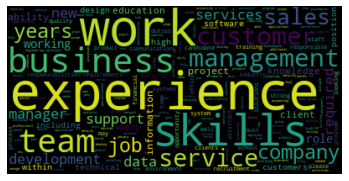

time: 955 ms (started: 2021-11-07 01:04:38 +00:00)


In [ ]:
generate_wordcloud(unique_total)

In [ ]:
generate_bar_plot(unique_total)

time: 326 ms (started: 2021-11-07 02:27:15 +00:00)


In [ ]:
unique_total.describe()

,freq
count,1.506524e+06
mean,1.850839e+01
std,1.712185e+02
min,3.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,1.100000e+01
max,7.905400e+04


time: 84 ms (started: 2021-11-07 02:13:17 +00:00)
